## step1: Data Injestion

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression

In [3]:
data = make_regression(n_samples=10000,n_features=1,n_informative=1,noise=13)

In [4]:
data[1]

array([  5.65595315, -29.74447516,   0.53573791, ..., -18.16310433,
         9.89751612, -29.35749118])

In [5]:
df = pd.DataFrame(data[0],columns=['x'])
df.head()

,x
0,0.931247
1,-0.473773
2,-0.032407
3,0.137800
4,-0.375008


In [6]:
df['y'] = data[1]
df.head()

,x,y
0,0.931247,5.655953
1,-0.473773,-29.744475
2,-0.032407,0.535738
3,0.137800,-4.973482
4,-0.375008,-27.059525


In [7]:
df

,x,y
0,0.931247,5.655953
1,-0.473773,-29.744475
2,-0.032407,0.535738
3,0.137800,-4.973482
4,-0.375008,-27.059525
...,...,...
9995,-0.363542,-1.866878
9996,-1.434535,-10.227530
9997,-1.485481,-18.163104
9998,-0.187521,9.897516


In [8]:
from matplotlib import pyplot as plt

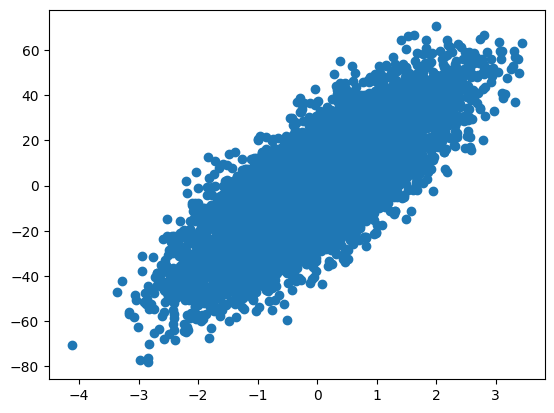

In [9]:
plt.scatter(df['x'],df['y'])
plt.show()

In [10]:
df.shape

(10000, 2)

## Step2 : Data preprocessing

In [11]:
df.describe()

,x,y
count,10000.000000,10000.000000
mean,-0.001347,-0.047871
std,1.008409,21.500949
min,-4.126468,-78.329547
25%,-0.683713,-14.503530
50%,0.014143,-0.048705
75%,0.674451,14.305488
max,3.450276,70.447528


## Spliting of data into train test

In [12]:
x = df['x']
y = df['y']

In [13]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,train_size=0.8)


In [14]:
x_train.shape,y_train.shape

((8000,), (8000,))

In [15]:
x_test.shape,y_test.shape

((2000,), (2000,))

In [16]:
x_train = np.array(x_train).reshape((-1,1))
y_train = np.array(y_train).reshape((-1,1))
x_test = np.array(x_test).reshape((-1,1))
y_test = np.array(y_test).reshape((-1,1))


In [17]:
x_train.shape,y_train.shape

((8000, 1), (8000, 1))

## Step 4 +: Model Building

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [22]:
model.coef_

array([[16.90640727]])

In [23]:
model.intercept_

array([-0.07830445])

In [24]:
x_train.shape[0]

8000

In [48]:
from sklearn.model_selection import KFold

validation = KFold(10)

In [49]:
import numpy as np
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [50]:
y

array([[  5.65595315],
       [-29.74447516],
       [  0.53573791],
       ...,
       [-18.16310433],
       [  9.89751612],
       [-29.35749118]])

In [51]:


from sklearn.model_selection import cross_val_score
result = cross_val_score(model,x,y,cv=validation)


In [52]:
print(result)

[0.6203542  0.64332627 0.64267301 0.63898808 0.57498929 0.59499924
 0.66260851 0.64113008 0.64230264 0.64177623]


In [53]:
result.mean()

0.6303147536479357

## Step 5: Model Evaluation

In [ ]:
from sklearn.metrics import r2_score as r2

#for calculating adjusted R2 score
def adj_r2(act,pred):
    return 1 - ((1-r2(act,pred))*(act.shape[0]-1))/(act.shape[0]-1-1)

print("Adj. R2 Score:",adj_r2(y_train,y_train_pred))

Adj. R2 Score: 0.6321736874471653


In [ ]:
print("Adj. R2 Score:",adj_r2(y_test,y_test_pred))

Adj. R2 Score: 0.6291159405954765


# saving the model

In [ ]:
import pickle

In [ ]:
with open("model.pkl",'wb') as file:
    pickle.dump(model,file)
    file.close()

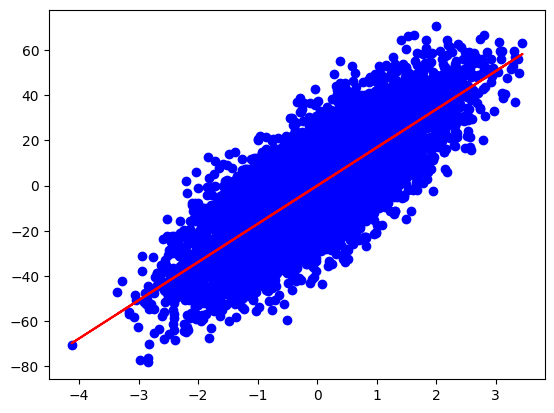

In [ ]:
plt.scatter(x_train,y_train,c='b')
plt.scatter(x_test,y_test,c='b')
plt.plot(x_train,y_train_pred,c='red')
plt.plot(x_test,y_test_pred,c='red')

plt.show()



# best model

In [ ]:
# Bias varience tradeoff